In [15]:
import pandas as pd

url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df = pd.read_csv(url, skiprows=1)

month_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = df[['Year'] + month_cols]

df_melted = df.melt(id_vars='Year', value_vars=month_cols,
                    var_name='Month', value_name='TempAnomaly')

df_melted = df_melted[pd.to_numeric(df_melted['TempAnomaly'], errors='coerce').notnull()]

df_melted['date'] = pd.to_datetime(df_melted['Year'].astype(str) + df_melted['Month'], format='%Y%b')

df_clean = df_melted[['date', 'TempAnomaly']].sort_values('date')


In [16]:
co2_url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'
co2_df = pd.read_csv(co2_url, skiprows=40)
co2_df['date'] = pd.to_datetime(co2_df[['year', 'month']].assign(day=1))
co2_df = co2_df[['date', 'average']].rename(columns={'average': 'co2'})


In [17]:
df = pd.merge(monthly_temp, co2_df, on="date", how="inner")
df = df.set_index("date").sort_index()

import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

SEQ_LEN = 12
X, y = [], []
for i in range(len(scaled) - SEQ_LEN):
    X.append(scaled[i:i+SEQ_LEN])
    y.append(scaled[i+SEQ_LEN])
X, y = np.array(X), np.array(y)



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, X.shape[2])),
    Dense(X.shape[2])
])
model.compile(optimizer="adam", loss=tensorflow.keras.losses.MeanSquaredError())
model.fit(X, y, epochs=50, batch_size=16)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0882
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0029
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 16/50
50/50 ━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


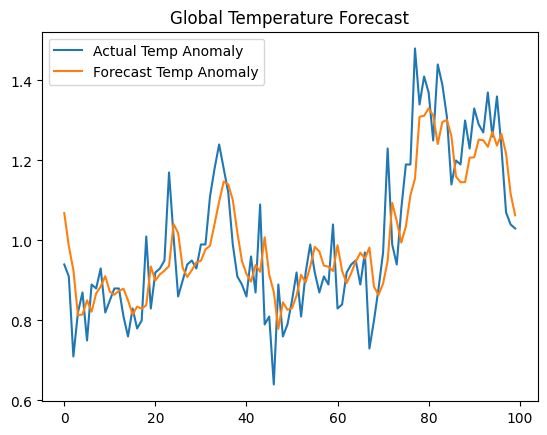

In [19]:
import matplotlib.pyplot as plt

pred = model.predict(X[-100:])
actual = scaler.inverse_transform(y[-100:])
forecast = scaler.inverse_transform(pred)

plt.plot(actual[:, 0], label="Actual Temp Anomaly")
plt.plot(forecast[:, 0], label="Forecast Temp Anomaly")
plt.legend()
plt.title("Global Temperature Forecast")
plt.show()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes
Fetching ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 1.5 KiB/? • 1.6 MiB/s • ?
README.md

config.json

custom_objects.py

tf_model.h5




Download complete: sharktide/ClimateStrike_ClimateForecast_r1 → /root/.cache/tensorflowtools/huggingface/sharktide/ClimateStrike_ClimateForecast_r1

Downloaded Files:
+-------------------+-----------+
| Filename          | Size      |
+-------------------+-----------+
| .gitattributes    | 1.5 KiB   |
| README.md         | 148.0 B   |
| config.json       | 0.0 B     |
| custom_objects.py | 91.0 B    |
| tf_model.h5       | 226.4 KiB |
+-------------------+-----------+


Forecasting: 100%|██████████| 300/300 [00:29<00:00, 10.02step/s]


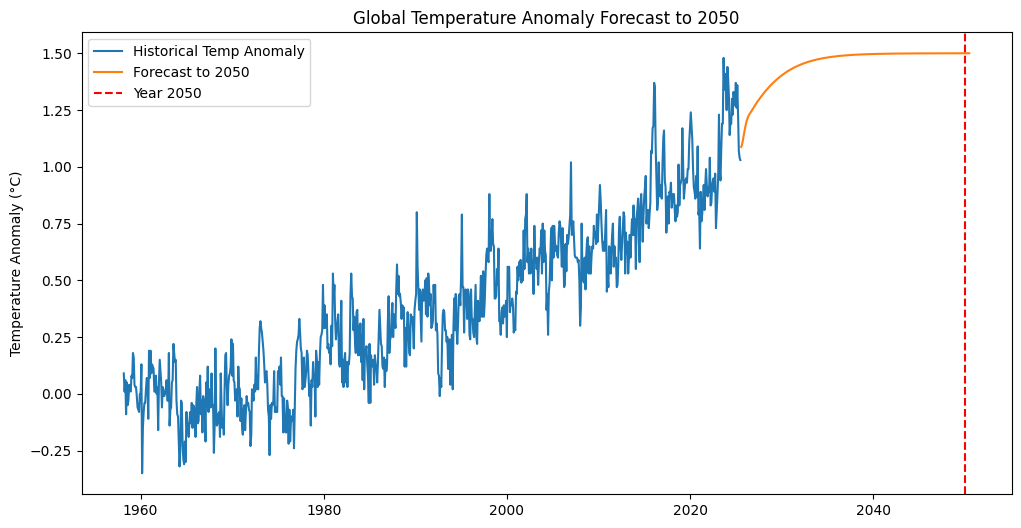

In [22]:
!pip install tensorflowtools
import tensorflowtools as tft

tft.hftools.download_model("sharktide", "ClimateStrike_ClimateForecast_r1")
m2 = tft.hftools.load_model("sharktide", "ClimateStrike_ClimateForecast_r1", "tf_model.h5")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

future_sequence = X[-1]
future_preds = []

for _ in tqdm(range(n_steps), desc="Forecasting", unit="step"):
    next_pred = m2.predict(np.expand_dims(future_sequence, axis=0), verbose=0)[0]
    future_preds.append(next_pred)

    future_sequence = np.vstack([future_sequence[1:], next_pred])

future_preds_real = scaler.inverse_transform(future_preds)

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_steps, freq='MS')

forecast_df = pd.DataFrame(future_preds_real, columns=df.columns, index=future_dates)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TempAnomaly'], label='Historical Temp Anomaly')
plt.plot(forecast_df.index, forecast_df['TempAnomaly'], label='Forecast to 2050')
plt.axvline(pd.Timestamp('2050-01-01'), color='red', linestyle='--', label='Year 2050')
plt.legend()
plt.title('Global Temperature Anomaly Forecast to 2050')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()


In [14]:
model.save("tf_model.h5")